データ形式(X,y):(12330, 18)
欠損データの数:0


0    3095
1     421
2      10
3    7486
4    1192
5     126
Name: cluster, dtype: int64

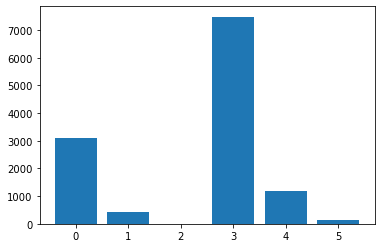

In [28]:
#AI-TECHGYM-1-4-A-1
#教師なし学習 k-mean法

# データ加工・処理・分析ライブラリ
import pandas as pd

# 実行フォルダ
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# データがあるurl の指定
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# データを取得して展開する
#対象データを読み込み
shoppers= pd.read_csv(file_url)

#データ形式、欠損データ
print('データ形式(X,y):{}'.format(shoppers.shape))
print('欠損データの数:{}'.format(shoppers.isnull().sum().sum()))

view_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'Region', 'SpecialDay']
df_view = shoppers.loc[:, view_columns]
kmeans = KMeans(init='random', n_clusters=6)
kmeans.fit(df_view)
df_view['cluster'] = pd.Series(kmeans.labels_)

# 各クラスタの数を表示
clusters = df_view['cluster'].value_counts().sort_index()
display(clusters)

# 各クラスタの数をグラフにプロット
plt.bar(clusters.index, clusters)
ax.set_xlabel('cluster number')
ax.set_ylabel('count')
plt.show()

In [13]:
type(df_view.loc[:,'cluster'])

pandas.core.series.Series

In [32]:
shoppers.count(False) - shoppers.isnull().sum()

Administrative             12330
Administrative_Duration    12330
Informational              12330
Informational_Duration     12330
ProductRelated             12330
ProductRelated_Duration    12330
BounceRates                12330
ExitRates                  12330
PageValues                 12330
SpecialDay                 12330
Month                      12330
OperatingSystems           12330
Browser                    12330
Region                     12330
TrafficType                12330
VisitorType                12330
Weekend                    12330
Revenue                    12330
dtype: int64

In [30]:
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [27]:
shoppers.count()

Administrative             12330
Administrative_Duration    12330
Informational              12330
Informational_Duration     12330
ProductRelated             12330
ProductRelated_Duration    12330
BounceRates                12330
ExitRates                  12330
PageValues                 12330
SpecialDay                 12330
Month                      12330
OperatingSystems           12330
Browser                    12330
Region                     12330
TrafficType                12330
VisitorType                12330
Weekend                    12330
Revenue                    12330
dtype: int64

In [49]:
#AI-TECHGYM-1-4-A-3
#教師なし学習 k-mean法

# データ加工・処理・分析ライブラリ
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データがあるurl の指定
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# データを取得して展開する
#対象データを読み込み
shoppers= pd.read_csv(file_url)

# データの列の絞り込み
shoppers_sub = shoppers[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Region','SpecialDay']]

# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(shoppers_sub)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# 金融機関のデータにクラスター番号のデータを結合
shoppers_with_cluster = pd.concat([shoppers, labels], axis=1)

# 分割のための区切りを設定
bins = [0,0.2,0.4,0.6,0.8,1]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_sp = pd.cut(shoppers_with_cluster.SpecialDay, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_sp], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_sp = df.groupby(['cluster_number', 'SpecialDay']).size().unstack().fillna(0)
display(cross_cluster_sp)

# 分割のための区切りを設定
bins_2 = [1,2,3,4,5,6,7,8,9]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_r = pd.cut(shoppers_with_cluster.Region, bins_2, right=False, labels=[1,2,3,4,5,6,7,8])

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_r], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_r = df.groupby(['cluster_number', 'Region']).size().unstack().fillna(0)
display(cross_cluster_r)


SpecialDay,"[0.0, 0.2)","[0.2, 0.4)","[0.4, 0.6)","[0.6, 0.8)","[0.8, 1.0)"
cluster_number,,,,,
0,386,6,7,2,15
1,10,0,0,0,0
2,1096,9,28,26,20
3,2807,49,48,83,71
4,6657,114,159,240,218
5,123,0,1,0,1


Region,1,2,3,4,5,6,7,8
cluster_number,,,,,,,,
0,181,39,83,35,12,25,17,15
1,8,0,1,1,0,0,0,0
2,464,119,239,110,27,64,78,39
3,1145,302,616,302,79,212,207,120
4,2912,667,1444,727,196,500,453,260
5,70,9,20,7,4,4,6,0
